# NAME - PARIKSHIT SAHU
## LETSGROWMORE INTERNSHIP PROJECT
### BEGINNER LEVEL

#### THE TASK OF THIS PROJECT IS TO DO STOCK PREDICTION AND FORECASTING USING STACKED LSTM

#### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("D:\LETSGROWMORE\Stock prize prediction.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN
...,...,...,...,...,...,...,...,...,...
2030,7/27/2010,117.60,119.50,112.00,118.80,118.65,586100,694.98,NaN
2031,7/26/2010,120.10,121.00,117.10,117.10,117.60,658440,780.01,NaN
2032,7/23/2010,121.80,121.95,120.25,120.35,120.65,281312,340.31,NaN
2033,7/22/2010,120.30,122.00,120.25,120.75,120.90,293312,355.17,NaN


#### DESCIRBING THE DATSET 

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000,0.0
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565,NaN
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877,NaN
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000,NaN
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000,NaN
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000,NaN
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000,NaN
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000,NaN


#### CHECKING FOR NULL VALUES

In [9]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0
8,Unnamed: 8,100.0


In [10]:
srt = df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
1421,1/1/2013,160.55,162.50,160.30,161.00,160.8,3237577,5226.72,NaN
1171,1/1/2014,160.85,162.65,159.90,160.35,160.5,1958707,3160.15,NaN
927,1/1/2015,150.95,151.75,150.35,150.50,150.7,535692,809.15,NaN
679,1/1/2016,146.05,148.80,145.50,146.40,146.4,781067,1148.71,NaN
184,1/1/2018,317.75,317.80,311.80,313.45,312.9,1602814,5040.75,NaN


In [11]:
srt.reset_index(inplace=True) 

In [12]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,1421,1/1/2013,160.55,162.50,160.30,161.00,160.8,3237577,5226.72,NaN
1,1171,1/1/2014,160.85,162.65,159.90,160.35,160.5,1958707,3160.15,NaN
2,927,1/1/2015,150.95,151.75,150.35,150.50,150.7,535692,809.15,NaN
3,679,1/1/2016,146.05,148.80,145.50,146.40,146.4,781067,1148.71,NaN
4,184,1/1/2018,317.75,317.80,311.80,313.45,312.9,1602814,5040.75,NaN


#### DATA VISUALIZATION BY PLOTTING GRAPHS

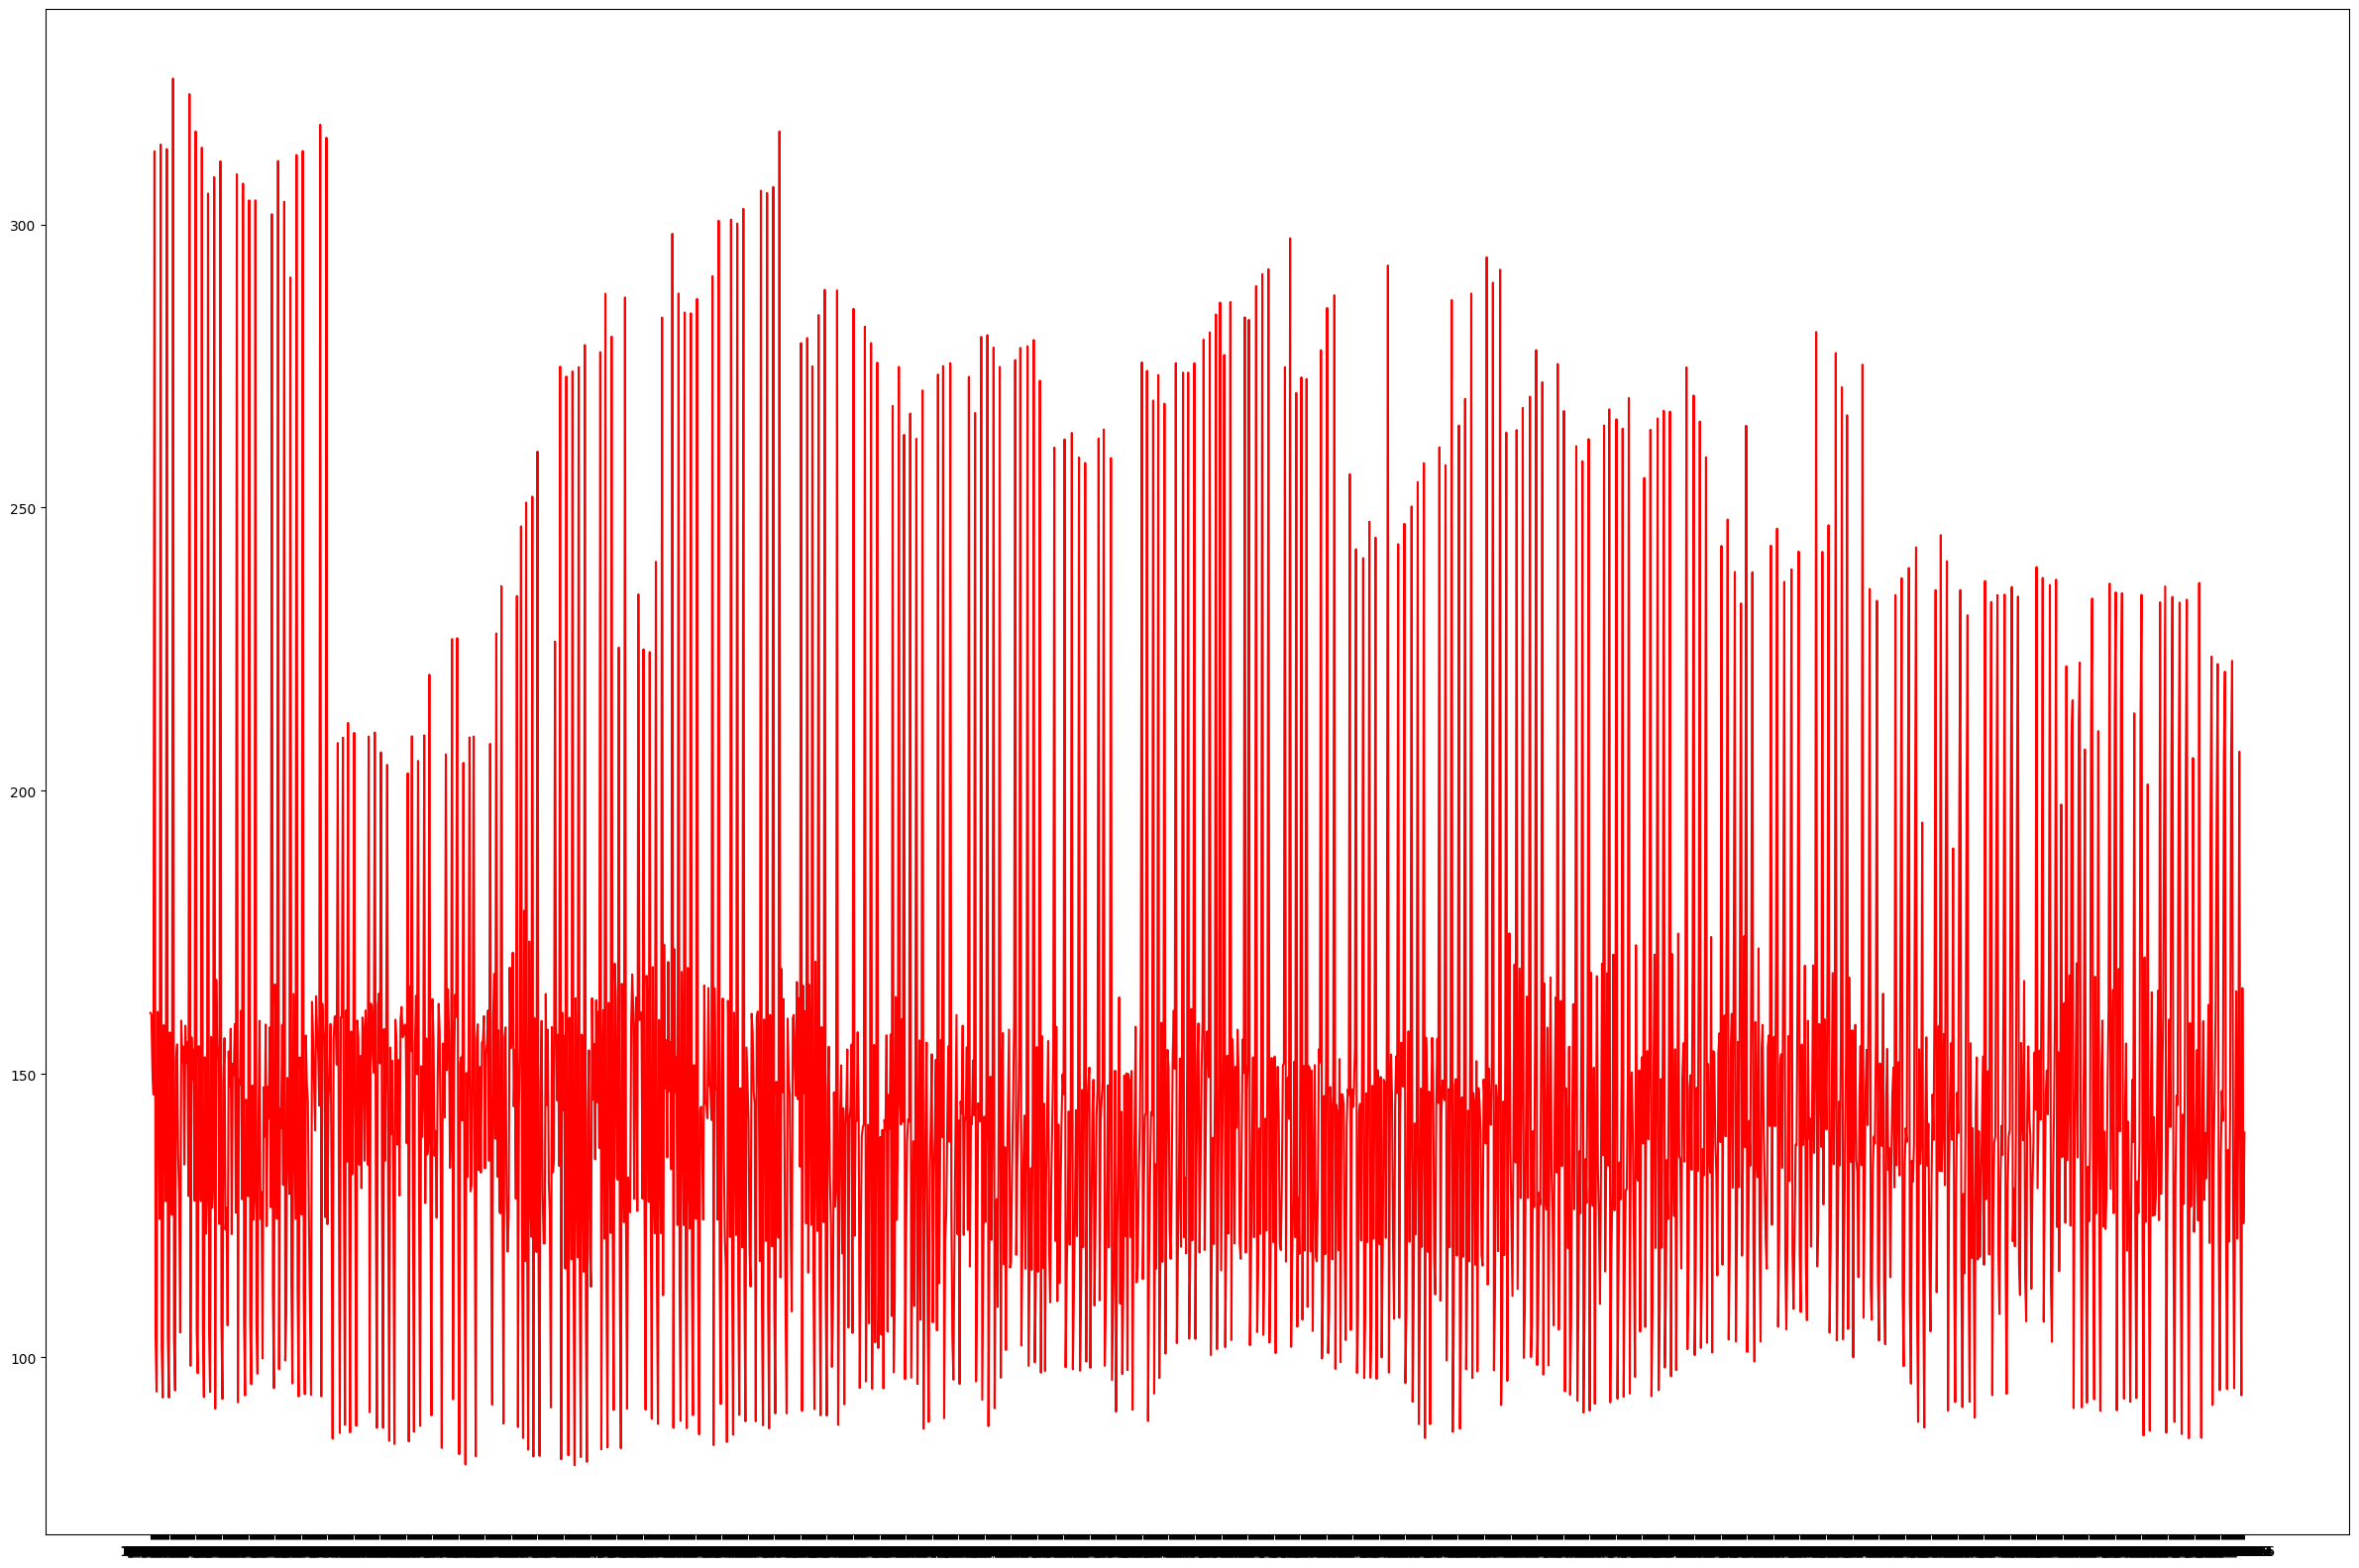

In [60]:
plt.figure(figsize=(30,20))
plt.plot(srt['Date'],srt['Close'],c = "red") 

In [15]:
close_srt = srt['Close']
close_srt

0       160.80
1       160.50
2       150.70
3       146.40
4       312.90
         ...  
2030    127.80
2031     93.30
2032    165.20
2033    123.65
2034    139.70
Name: Close, Length: 2035, dtype: float64

#### NORMALIZING THE DATA

In [16]:
scaler = MinMaxScaler(feature_range=(0,1)) 
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1, 1))
close_srt

array([[0.32618464],
       [0.32495915],
       [0.28492647],
       ...,
       [0.3441585 ],
       [0.1744281 ],
       [0.23999183]])

#### SPLITTING THE DATA


In [17]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [18]:
train_data.shape

(1424, 1)

In [19]:
test_data.shape

(611, 1)

#### CONVERTING INTO DATASET MATRIX

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [23]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
X_train

array([[[0.32618464],
        [0.32495915],
        [0.28492647],
        ...,
        [0.10314542],
        [0.05841503],
        [0.27389706]],

       [[0.32495915],
        [0.28492647],
        [0.26736111],
        ...,
        [0.05841503],
        [0.27389706],
        [0.17708333]],

       [[0.28492647],
        [0.26736111],
        [0.94750817],
        ...,
        [0.27389706],
        [0.17708333],
        [0.19362745]],

       ...,

       [[0.38357843],
        [0.22732843],
        [0.1744281 ],
        ...,
        [0.76143791],
        [0.04534314],
        [0.14787582]],

       [[0.22732843],
        [0.1744281 ],
        [0.12214052],
        ...,
        [0.04534314],
        [0.14787582],
        [0.19750817]],

       [[0.1744281 ],
        [0.12214052],
        [0.25183824],
        ...,
        [0.14787582],
        [0.19750817],
        [0.3682598 ]]])

In [26]:
X_test

array([[[0.75428922],
        [0.04799837],
        [0.14215686],
        ...,
        [0.21098856],
        [0.13684641],
        [0.29738562]],

       [[0.04799837],
        [0.14215686],
        [0.2183415 ],
        ...,
        [0.13684641],
        [0.29738562],
        [0.31147876]],

       [[0.14215686],
        [0.2183415 ],
        [0.19158497],
        ...,
        [0.29738562],
        [0.31147876],
        [0.23304739]],

       ...,

       [[0.18198529],
        [0.23325163],
        [0.53615196],
        ...,
        [0.25020425],
        [0.51450163],
        [0.19138072]],

       [[0.23325163],
        [0.53615196],
        [0.62765523],
        ...,
        [0.51450163],
        [0.19138072],
        [0.05044935]],

       [[0.53615196],
        [0.62765523],
        [0.16278595],
        ...,
        [0.19138072],
        [0.05044935],
        [0.3441585 ]]])

#### CREATING THE STACKED LSTM MODEL

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### PREDICTING THE VALUES AND CHECKING THE PERFORMANCE

In [31]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 7s 150ms/step - loss: 0.0552 - val_loss: 0.0425
Epoch 2/60
19/19 [==============================] - 2s 90ms/step - loss: 0.0424 - val_loss: 0.0427
Epoch 3/60
19/19 [==============================] - 2s 92ms/step - loss: 0.0425 - val_loss: 0.0432
Epoch 4/60
19/19 [==============================] - 2s 93ms/step - loss: 0.0423 - val_loss: 0.0429
Epoch 5/60
19/19 [==============================] - 2s 90ms/step - loss: 0.0423 - val_loss: 0.0427
Epoch 6/60
19/19 [==============================] - 2s 90ms/step - loss: 0.0421 - val_loss: 0.0433
Epoch 7/60
19/19 [==============================] - 2s 91ms/step - loss: 0.0427 - val_loss: 0.0436
Epoch 8/60
19/19 [==============================] - 2s 92ms/step - loss: 0.0424 - val_loss: 0.0422
Epoch 9/60
19/19 [==============================] - 2s 91ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 10/60
19/19 [==============================] - 2s 90ms/step - loss: 0.0423 - val_loss: 0.0423
Epoch 11

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 21ms/step


In [33]:
train_predict = scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error

In [35]:
math.sqrt(mean_squared_error(y_train,train_predict))

149.48042049772326

In [36]:
math.sqrt(mean_squared_error(y_test,test_predict))

150.56050642073595

#### PLOTTING THE GRAPH BETWEEN TRAIN ,TEST AND ACTUAL DATA

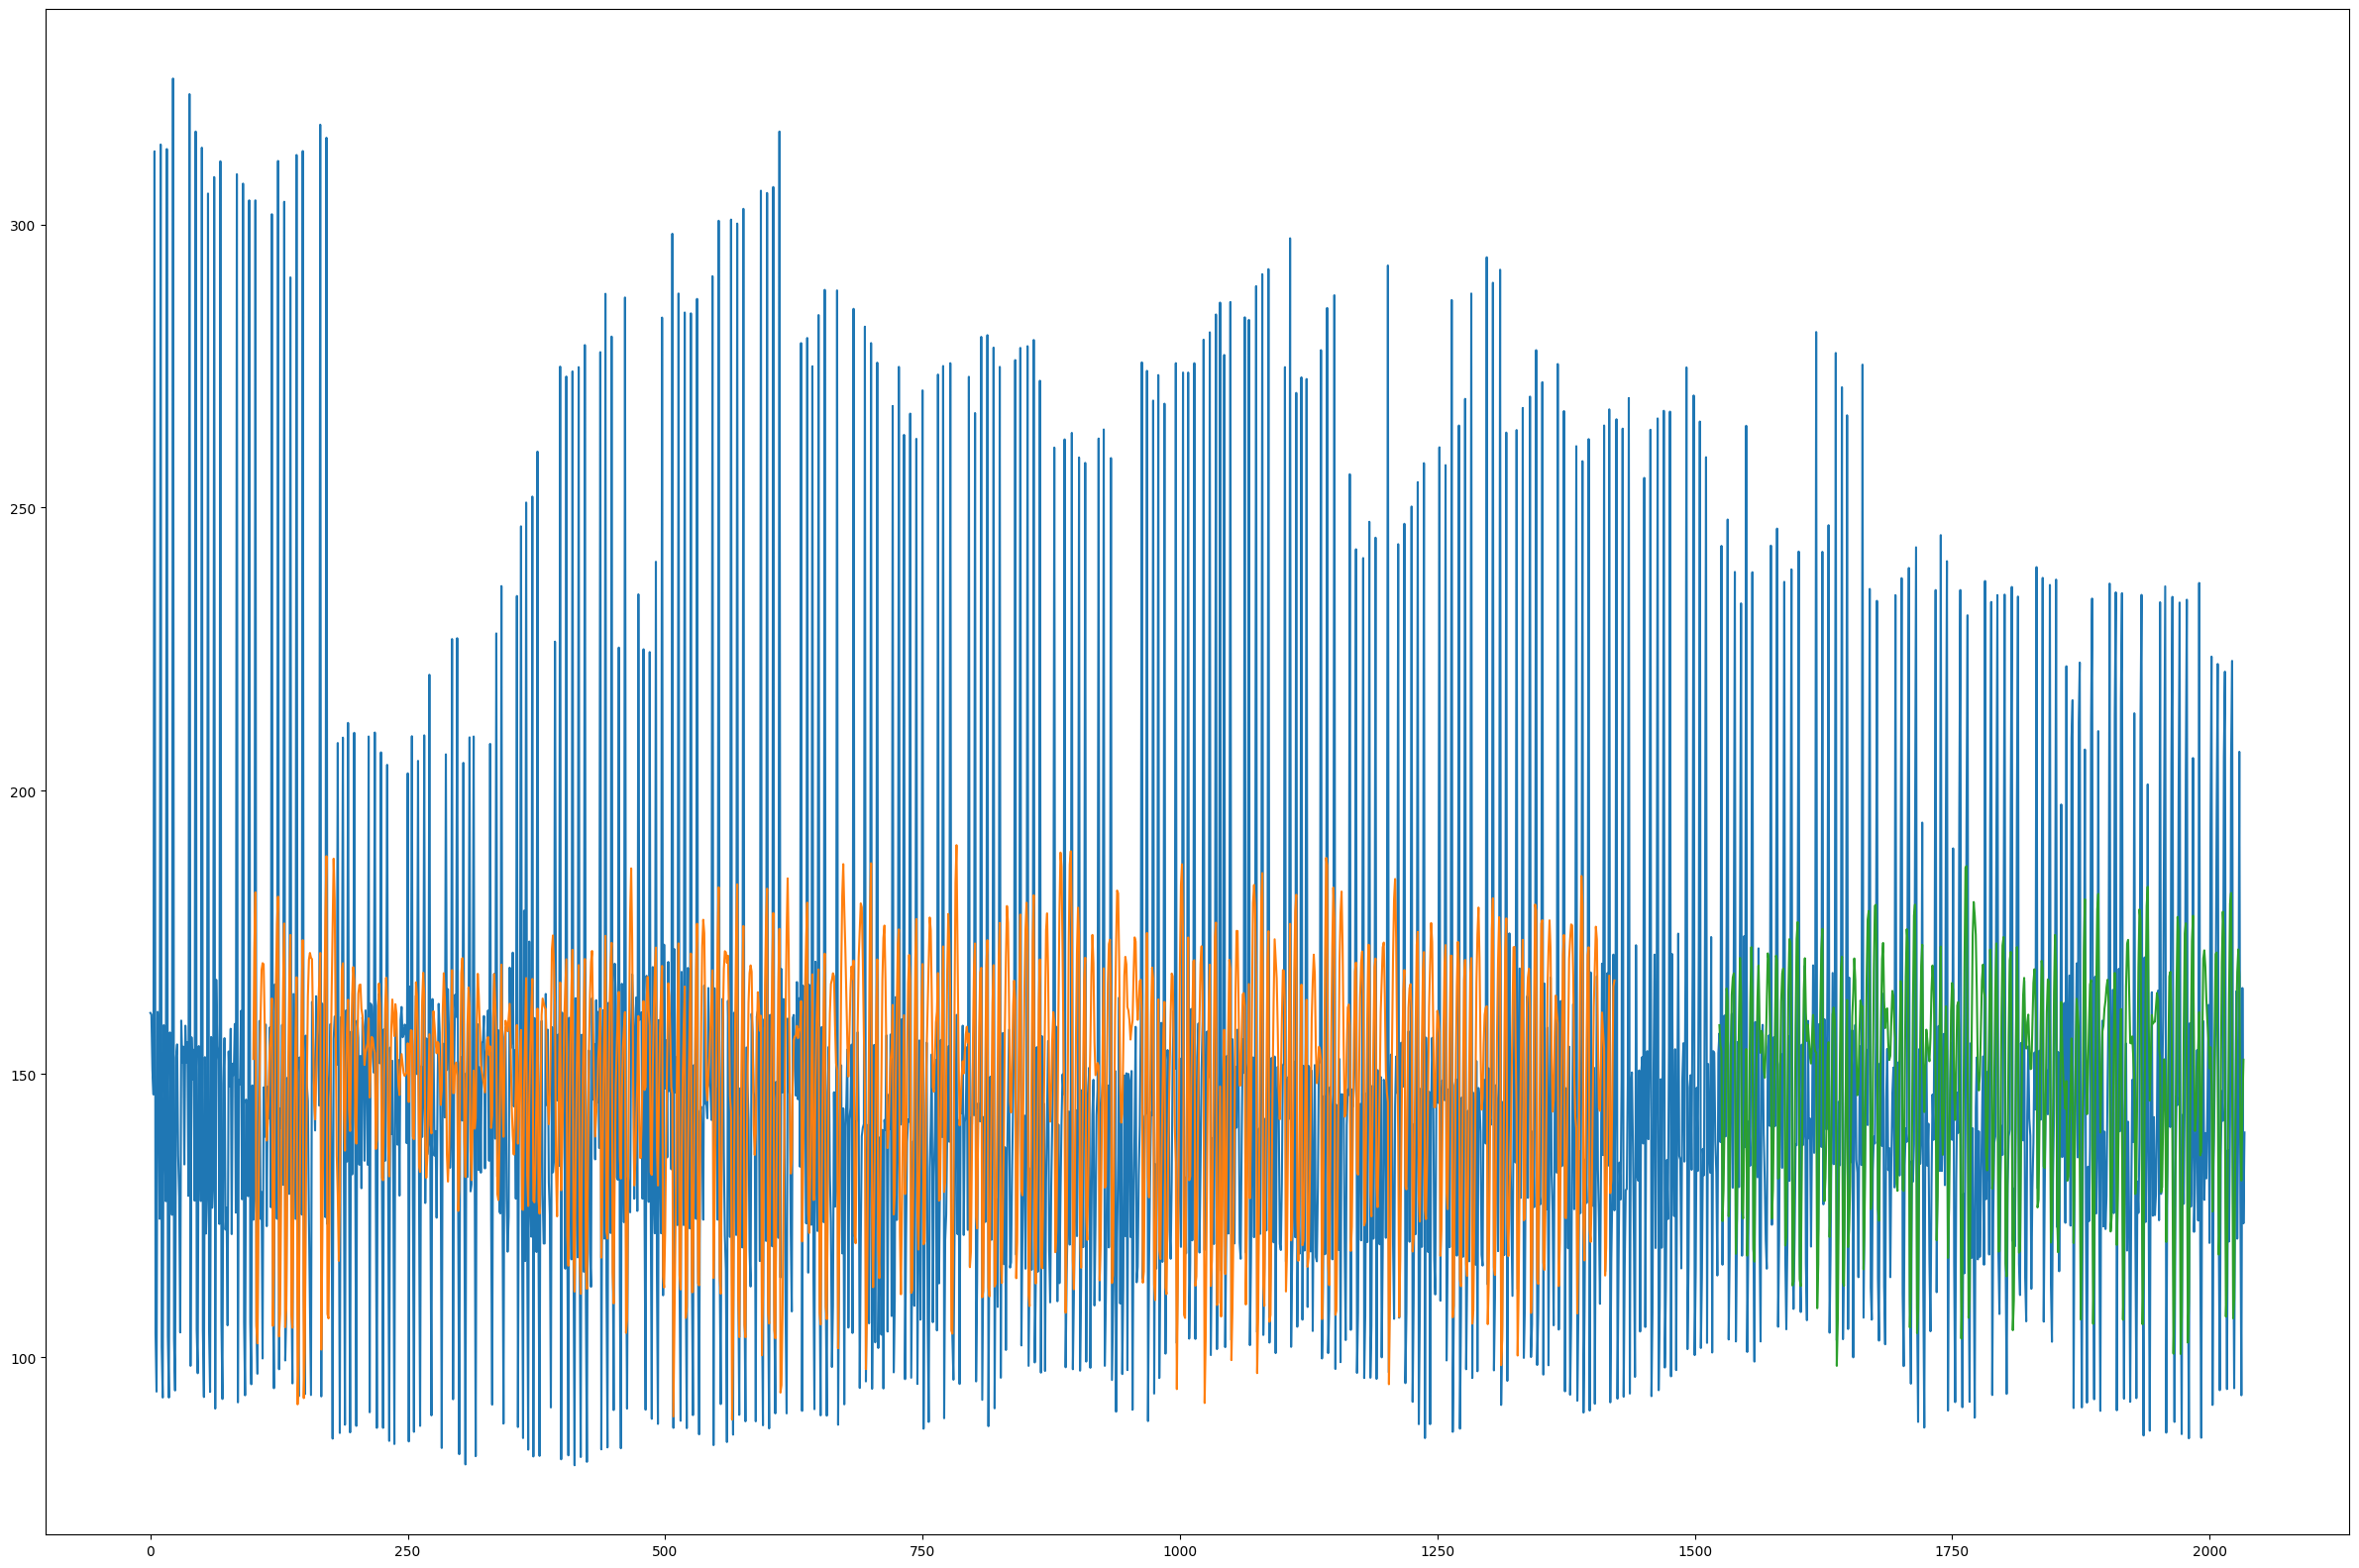

In [46]:
look_back = 100


trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict

plt.figure(figsize=(30,20))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

611

In [47]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [48]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [49]:
temp_input

[0.16278594771241828,
 0.02144607843137253,
 0.36621732026143783,
 0.1754493464052288,
 0.23672385620915037,
 0.49101307189542487,
 0.1740196078431372,
 0.024918300653594738,
 0.2612336601307189,
 0.34109477124182996,
 0.17994281045751637,
 0.25102124183006536,
 0.1803513071895424,
 0.1954656862745099,
 0.2540849673202614,
 0.3423202614379085,
 0.17667483660130723,
 0.6223447712418301,
 0.19566993464052285,
 0.26531862745098045,
 0.32414215686274517,
 0.47263071895424835,
 0.6337826797385621,
 0.02348856209150324,
 0.20261437908496738,
 0.2655228758169934,
 0.32148692810457513,
 0.24387254901960786,
 0.5053104575163399,
 0.6262254901960784,
 0.17422385620915026,
 0.031249999999999944,
 0.20710784313725494,
 0.26654411764705876,
 0.2598039215686275,
 0.48059640522875813,
 0.622140522875817,
 0.1711601307189542,
 0.022467320261437884,
 0.252859477124183,
 0.18852124183006536,
 0.26879084967320255,
 0.4991830065359477,
 0.6241830065359477,
 0.16564542483660127,
 0.019403594771241817,
 0.3

In [56]:
lst_output=[] 
n_steps=100
i=0
while(i<30): 
    
    if(len(temp_input)>100):
    
        pred_input=np.array(temp_input[1:]) 
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.57230392 0.19097222 0.05494281 0.22732843 0.16135621 0.25020425
 0.50980392 0.58006536 0.18913399 0.05555556 0.22753268 0.34170752
 0.16339869 0.25020425 0.51450163 0.19138072 0.05044935 0.3441585
 0.1744281  0.23999183 0.34228581 0.31507796 0.27651882 0.26103097
 0.27162662 0.291765   0.30568621 0.30771568 0.30149102 0.29488966
 0.29304764 0.2957097  0.29929814 0.30110371 0.30049977 0.29868186
 0.29711917 0.29661313 0.29630876 0.29636428 0.29589215 0.29492125
 0.29370746 0.29250383 0.29203755 0.29157412 0.29099891 0.29031283
 0.28969523 0.28900674 0.28834423 0.28821269 0.28815988 0.28796732
 0.28773263 0.2875888  0.28742063 0.28723508 0.28754604 0.28789291
 0.28803414 0.28817621 0.28832242 0.28839642 0.28843409 0.28891036
 0.28937012 0.28954628 0.28973404 0.28990808 0.28992847 0.29024172
 0.29050964 0.2906701  0.29073051 0.2908307  0.29058471 0.29076803
 0.29098067 0.29098862 0.29088652 0.29085827 0.29081956 0.29080835
 0.29075861 0.29064748 0.29062939 0.29041809 0.2901

In [57]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [58]:
len(close_srt)

2035

#### PLOTTING THE GRAPH FOR CLOSING PRICE

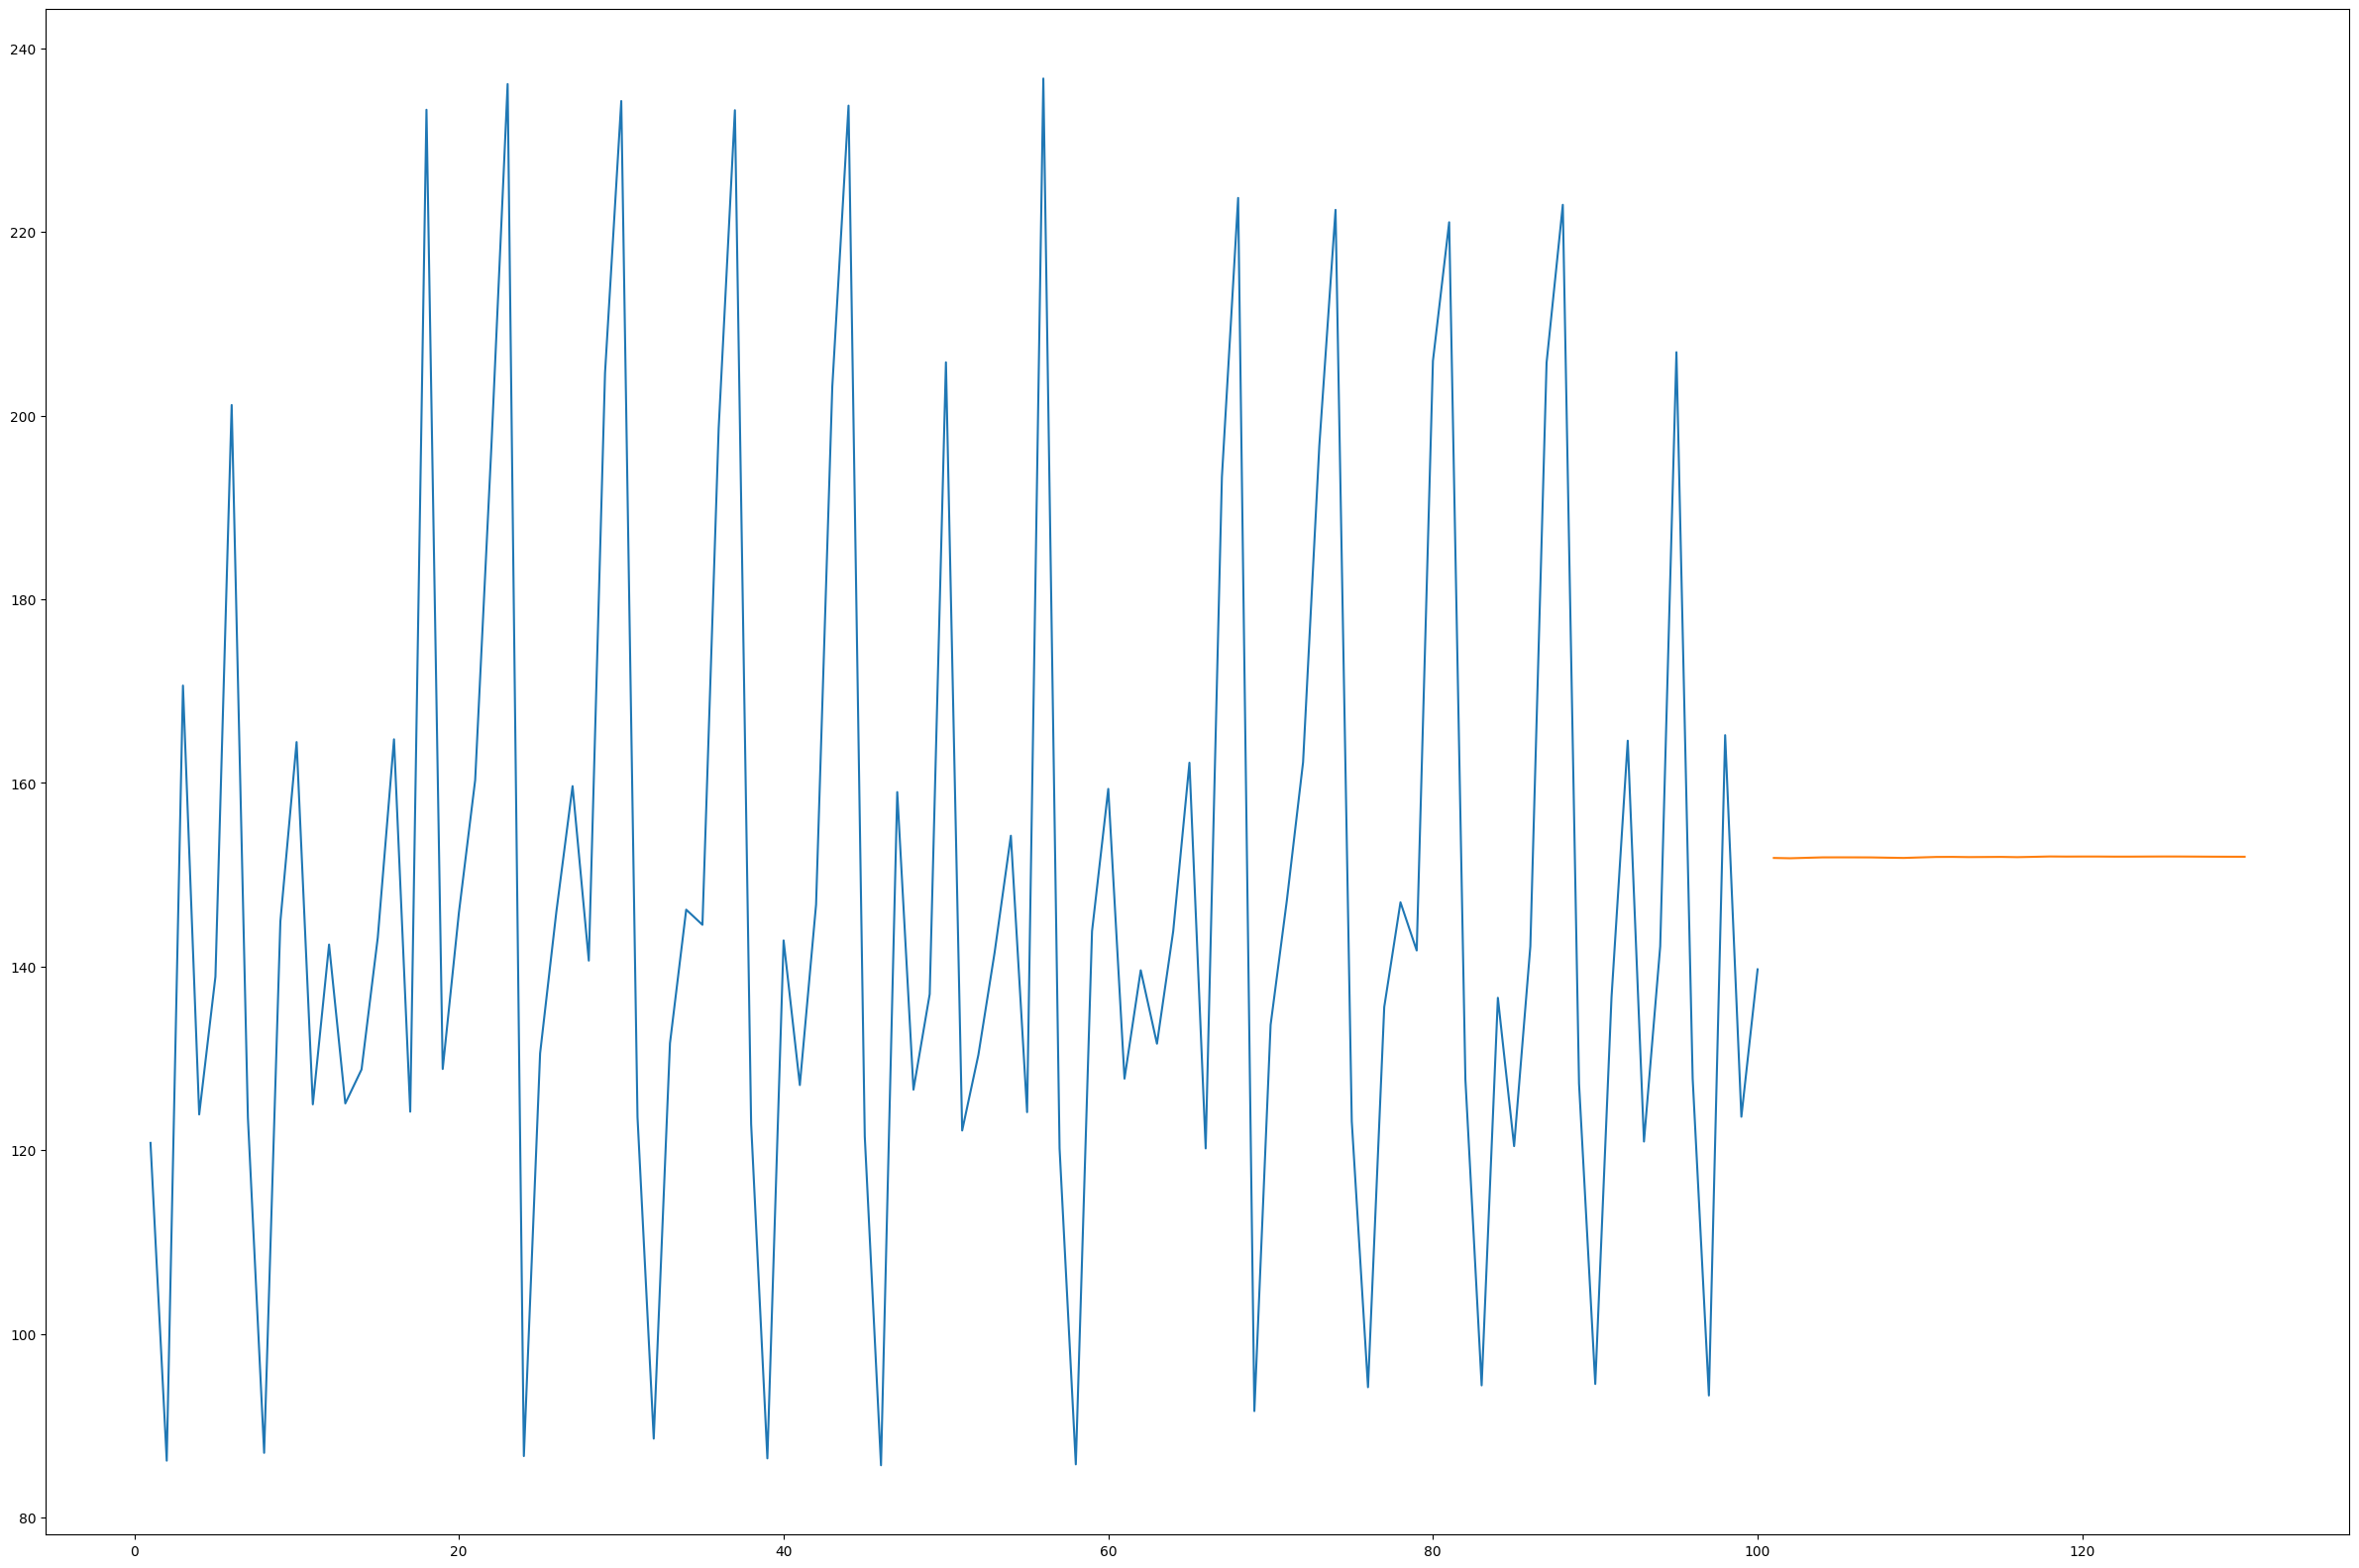

In [59]:
plt.figure(figsize=(30,20))
plt.plot(day_new,scaler.inverse_transform(close_srt[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))